# Importing the necessary dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Data-collection

In [2]:
#loading the datset
df = pd.read_csv('C:/Users/Hemant/jupyter_codes/ML Project 1/Wine qualiy prediction/winequality-red.csv')

In [3]:
#check the first 5 row
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#to check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#shape of the dataset
df.shape

(1599, 12)

In [6]:
#statistical measure of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#checking for missing values in the dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data visualization

In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

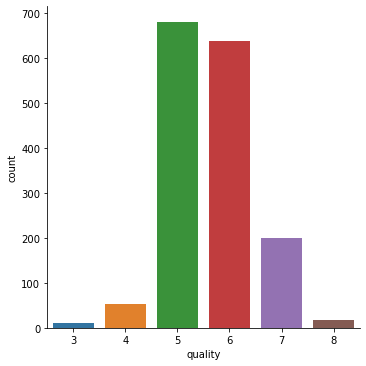

In [9]:
sns.catplot(x = 'quality', data = df, kind = 'count')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

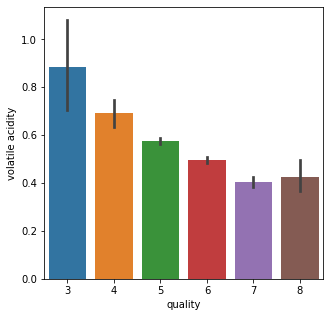

In [10]:
# volatile acidity and quality
plot = plt.figure(figsize = (5, 5))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df )

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

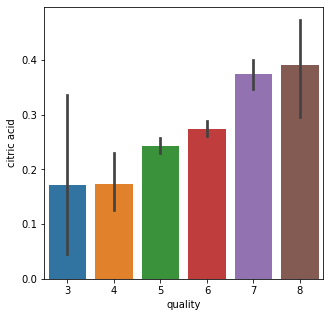

In [11]:
# citric acid and quality
plot = plt.figure(figsize = (5, 5))
sns.barplot(x = 'quality', y = 'citric acid', data = df )

correlation between the data columns

In [12]:
correlation = df.corr()

<AxesSubplot:>

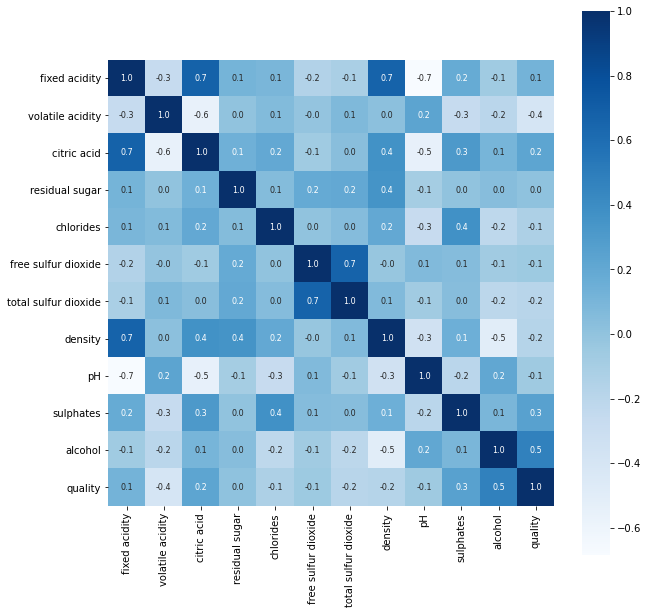

In [13]:
#constructing a heatmap to undersatnd the correlation
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

# Data preprocessing

In [14]:
#separating the data and label
X = df.drop('quality', axis = 1)

In [15]:
#label binarization
Y = df['quality'].apply(lambda y_values : 1 if y_values >= 7 else 0)

In [16]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [17]:
#splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .3, stratify = Y, random_state = 45)

Model training

Random tree classifier

In [18]:
model = RandomForestClassifier()

In [19]:
model.fit(x_train, y_train)

RandomForestClassifier()

Model evaluation

accuracy score

In [20]:
#model evaluatio on tarining data
training_prediction = model.predict(x_train)

training_accuracy = accuracy_score(training_prediction, y_train)

print('THE ACCURACY OF THE TRAINING MODEL IS :', training_accuracy)

THE ACCURACY OF THE TRAINING MODEL IS : 1.0


In [21]:
#model evaluation on testing data
testing_prediction = model.predict(x_test)

testing_accuracy = accuracy_score(testing_prediction, y_test)

print('THE ACCURACY OF THE TRAINING MODEL IS :', testing_accuracy)

THE ACCURACY OF THE TRAINING MODEL IS : 0.9083333333333333


# Building a predictive system

In [24]:
input_data = input()
input_list = [float(i) for i in input_data.split(',')]

input_array = np.asarray(input_list)
reshaped_array = input_array.reshape(1, -1)

prediction = model.predict(reshaped_array)
print('THE PREDICTION IS :', prediction)
if prediction == 1:
    print('THE WINE IS BEST QUALITY')
else:
    print('THE WINE IS SO SO')

7.6,0.51,0.15,2.8,0.11,33.0,73.0,0.9955,3.17,0.63,10.2
THE PREDICTION IS : [0]
THE WINE IS SO SO
